Loading news data...
Loading stock data...
Aggregating data by date...
 Data preparation completed!
Analysis period: 2009-04-27 00:00:00 to 2020-06-11 00:00:00
Total days with both news and stock data: 2757

=== CORRELATION ANALYSIS ===
Pearson Correlation: -0.0264
P-value: 0.1658
 Correlation is not statistically significant
Correlation strength: very weak

=== LAGGED CORRELATIONS ===
Lag 1 day(s): -0.0534 (p-value: 0.0050) ✅
Lag 2 day(s): -0.0627 (p-value: 0.0010) ✅
Lag 3 day(s): -0.0317 (p-value: 0.0959) _X_
Lag 4 day(s): -0.0293 (p-value: 0.1242) _X_
Lag 5 day(s): -0.0223 (p-value: 0.2426) _X_

Creating correlation heatmap...


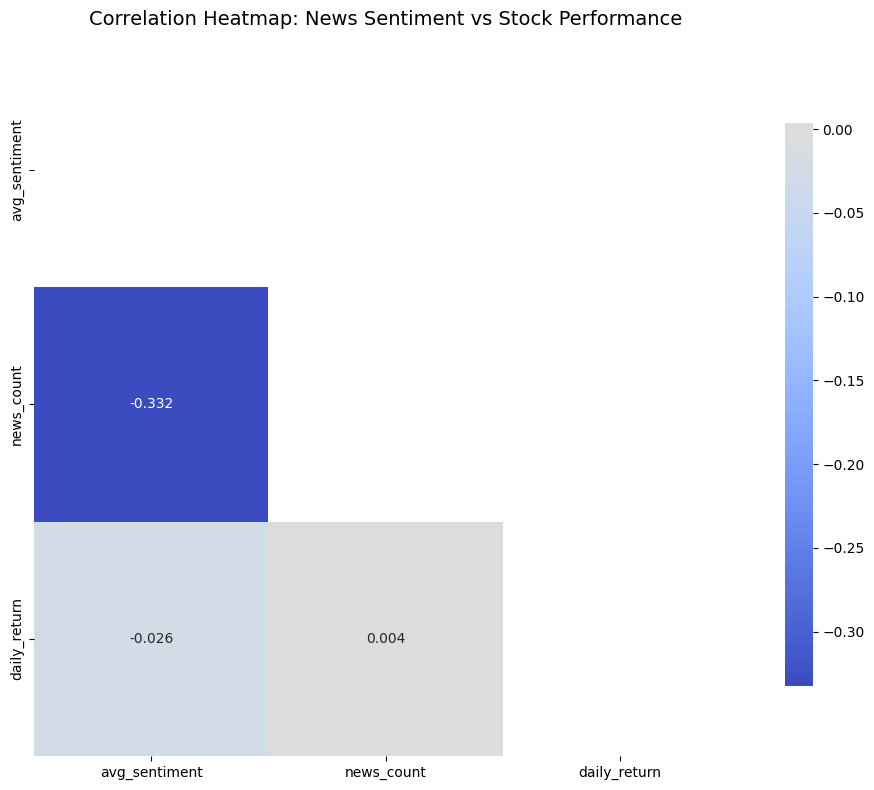

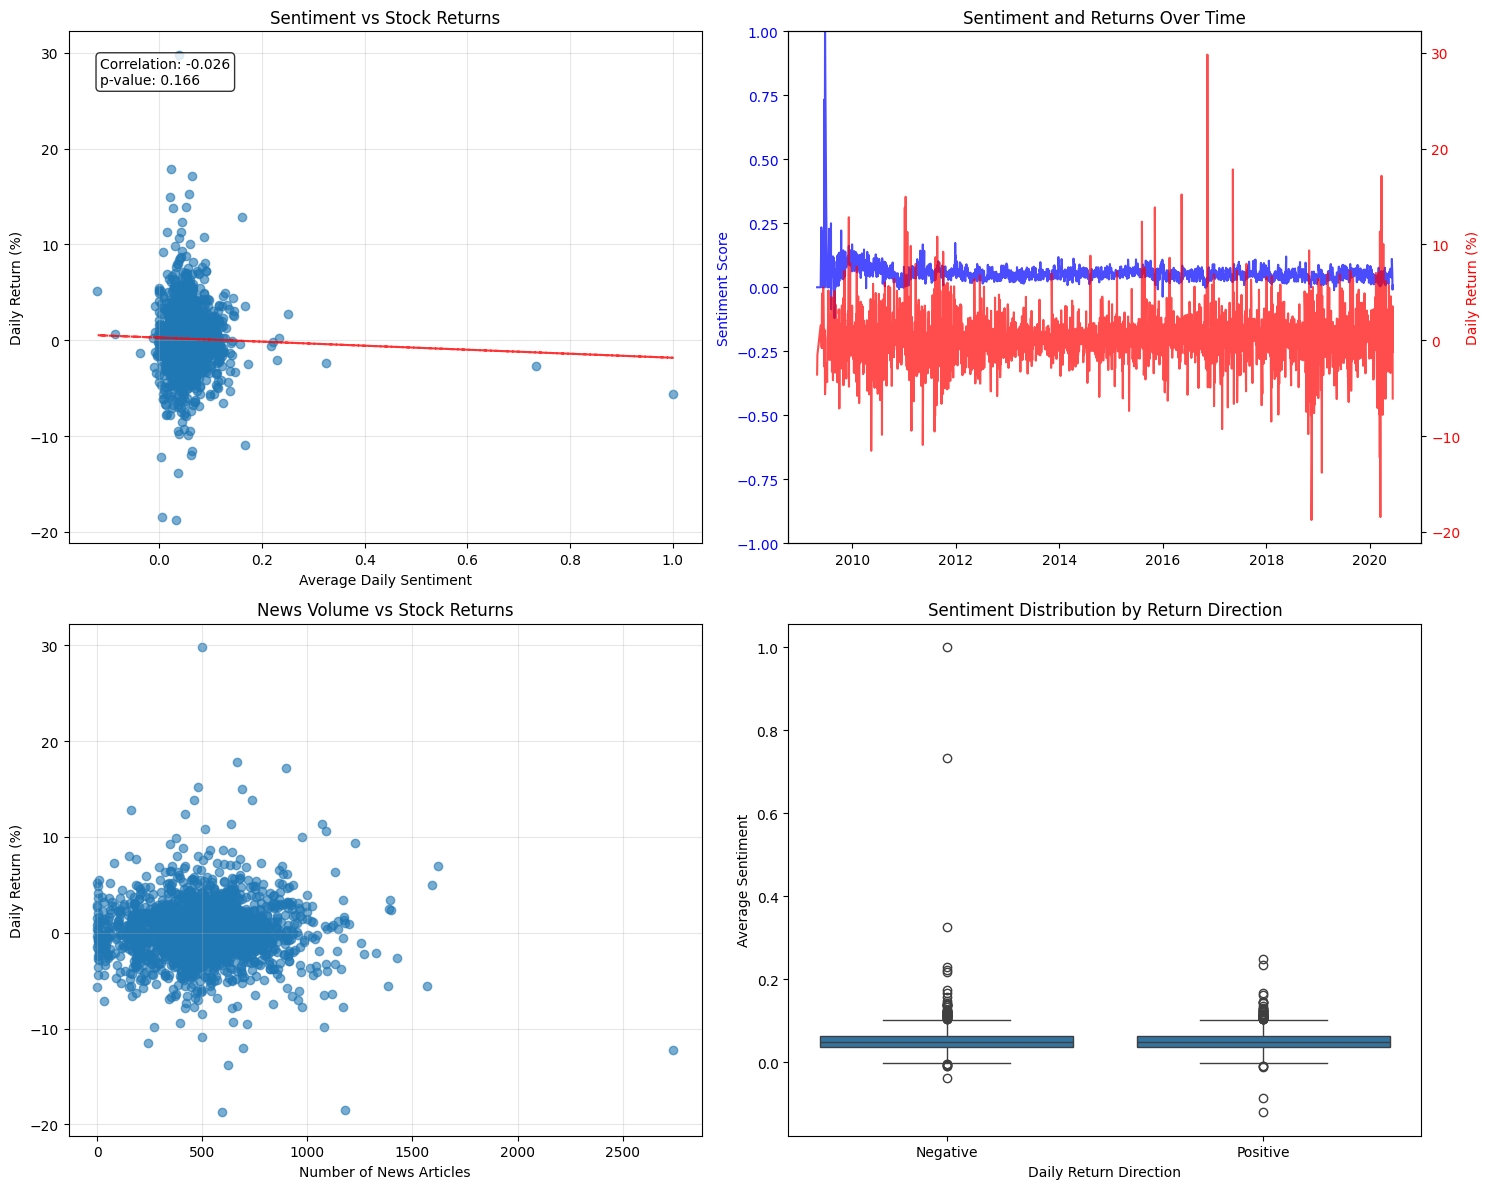


=== ADVANCED ANALYSIS ===
Correlation on high-sentiment days: -0.0813 (p-value: 0.0025)


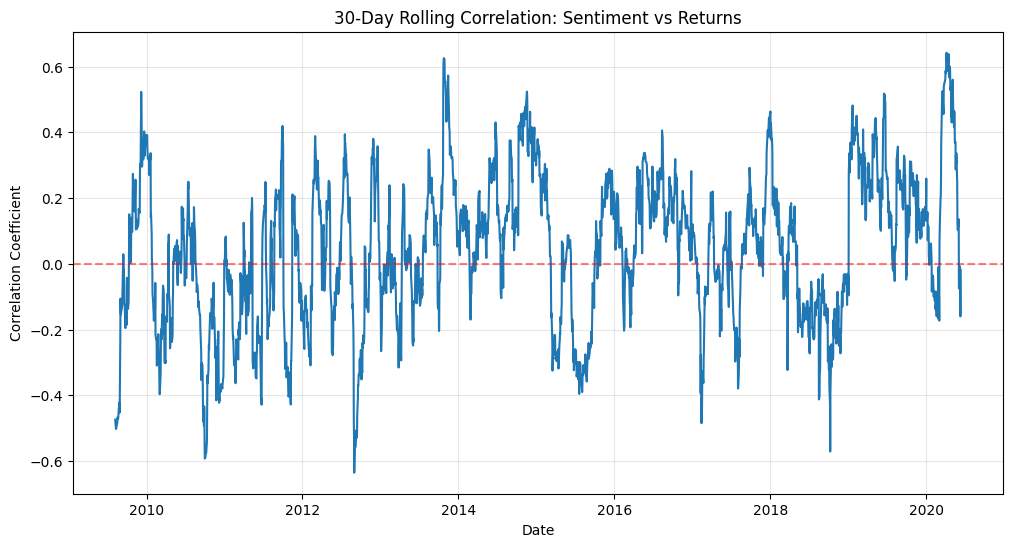

Average rolling correlation: 0.0437

=== SENTIMENT CATEGORY ANALYSIS ===
Average Returns by Sentiment Category:
                        mean       std  count
sentiment_category                           
Negative            5.139154       NaN      1
Neutral             0.170894  2.672836   2642
Positive           -0.166005  2.926106    114


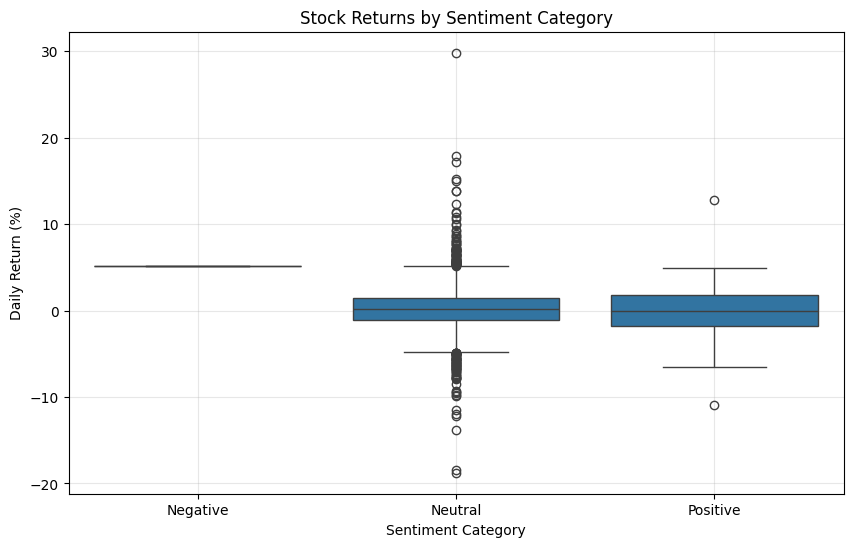


=== SUMMARY STATISTICS ===
       avg_sentiment  daily_return   news_count
count    2757.000000   2757.000000  2757.000000
mean        0.052939      0.158765   500.428364
std         0.033751      2.685240   210.730751
min        -0.120524    -18.755836     1.000000
25%         0.037289     -1.156064   388.000000
50%         0.049926      0.128609   491.000000
75%         0.063825      1.419681   610.000000
max         1.000000     29.806712  2739.000000


In [1]:
import sys
import os

# Add the modules directory to Python path
module_path = os.path.abspath(os.path.join('..', 'scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)

from correlation import CorrelationAnalysis


news_data_path = "../data/newsData/raw_analyst_ratings.csv"
stock_data_path = "../data/yfinance_data/Data/NVDA.csv"

analyzer = CorrelationAnalysis()

try:
        # Perform analysis
        merged_data, news_data, stock_data = analyzer.load_and_prepare_data(news_data_path, stock_data_path)
        
        if len(merged_data) > 0:
            # Run all analyses
            analyzer.calculate_correlations()
            analyzer.create_correlation_heatmap()
            analyzer.create_correlation_visualizations()
            analyzer.advanced_correlation_analysis()
            analyzer.sentiment_category_analysis()
            
            # Print summary statistics
            print(analyzer.get_summary_statistics())
        else:
            print(" No overlapping data found between news and stock datasets!")
        
except Exception as e:
        print(f" Error during analysis: {e}")
        import traceback
        print(traceback.format_exc())